In [1]:
import pandas as pd
import numpy as np
import re
import random # library for random number generation


*Reading the csv file into our notebook.*

In [2]:
recipes=pd.read_csv("../input/project/recipes.csv")

*Checking some info about the file.*

In [3]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [4]:
recipes.shape

(57691, 384)

i.e. 383 columns(each representing one ingredient)+ 1 column for country, and 57,691 rows(each representing a recipe).
-> each row represents a dish by its country and which ingredients are present in it out of 383. 

In [5]:
recipes['country'].value_counts()

American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: country, Length: 69, dtype: int64

Getting the names of all unique cuisines. 

In [6]:
q=list(recipes['country'].unique())
list.sort(q)
print(np.array(q))

['African' 'American' 'Asian' 'Austria' 'Bangladesh' 'Belgium'
 'Cajun_Creole' 'Canada' 'Caribbean' 'Central_SouthAmerican' 'China'
 'Chinese' 'East-African' 'Eastern-Europe' 'EasternEuropean_Russian'
 'English_Scottish' 'France' 'French' 'German' 'Germany' 'Greek' 'India'
 'Indian' 'Indonesia' 'Iran' 'Irish' 'Israel' 'Italian' 'Italy' 'Japan'
 'Japanese' 'Jewish' 'Korea' 'Lebanon' 'Malaysia' 'Mediterranean'
 'Mexican' 'Mexico' 'MiddleEastern' 'Moroccan' 'Netherlands'
 'North-African' 'Pakistan' 'Philippines' 'Portugal' 'Scandinavia'
 'Scandinavian' 'South-African' 'South-America' 'Southern_SoulFood'
 'Southwestern' 'Spain' 'Spanish_Portuguese' 'Switzerland' 'Thai'
 'Thailand' 'Turkey' 'UK-and-Ireland' 'Vietnam' 'Vietnamese'
 'West-African' 'asian' 'chinese' 'east_asian' 'italian' 'japanese'
 'korean' 'mexico' 'western']


In [7]:
print("there  are a total of",len(q),"unique cuisines.")

there  are a total of 69 unique cuisines.


__Here,we can make the following observations,__

In [8]:
x=recipes[recipes['country']=='Asian'].shape[0]
y=recipes[recipes['country']=='asian'].shape[0]
print('Asian dishes: ',x)
print('asian dishes: ',y)

Asian dishes:  1176
asian dishes:  17


__1.some cuisines have their names in both uppercase and lowercase thus increasing the no. of cuisines.__

In [9]:
print("the following are the names of the same cuisines with different names: ")
print("")
s=recipes['country']
print(s[s.str.match(r'(^chin.*)')].unique(),s[s.str.match(r'(^fr.*)')].unique(),s[s.str.match(r'(^germ.*)')].unique(),s[s.str.match(r'(^indi.*)')].unique(),s[s.str.match(r'(^it.*)')].unique(),s[s.str.match(r'(^jap.*)')].unique(),s[s.str.match(r'(^mex.*)')].unique(),s[s.str.match(r'(^sca.*)')].unique(),s[s.str.match(r'(^thai.*)')].unique(),s[s.str.match(r'(^v.*)')].unique())



the following are the names of the same cuisines with different names: 

['chinese'] [] [] [] ['italian'] ['japanese'] ['mexico'] [] [] []


__2.also,some cuisines that represent the same cuisine type are named differently,(eg cina,chinese).__

to summarize,
1. Cuisine column is labeled as country, which is inaccurate.
2. Cuisine names are not consistent as not all of them start with an uppercase first letter(eg: Asian and asian are treated as 2 seperate cuisines).
3. Some cuisines are duplicated as variation of the country name(such as Vietnam and Vietnamese).
4. Some cuisines have very few recipes.

__*LETS FIX THESE PROBLEMS*__

In [10]:
column_names = recipes.columns.values                             
column_names[0] = "cuisine"                                                #changing column name from country to cuisine
recipes.columns = column_names
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [11]:
recipes['cuisine']=recipes['cuisine'].str.lower()                            #making all the cuisine names lowercase.
q1=list(recipes['cuisine'].unique())
list.sort(q1)
print(np.array(q1))
print("")
print("there  are a total of",len(q1),"unique cuisines.")

['african' 'american' 'asian' 'austria' 'bangladesh' 'belgium'
 'cajun_creole' 'canada' 'caribbean' 'central_southamerican' 'china'
 'chinese' 'east-african' 'east_asian' 'eastern-europe'
 'easterneuropean_russian' 'english_scottish' 'france' 'french' 'german'
 'germany' 'greek' 'india' 'indian' 'indonesia' 'iran' 'irish' 'israel'
 'italian' 'italy' 'japan' 'japanese' 'jewish' 'korea' 'korean' 'lebanon'
 'malaysia' 'mediterranean' 'mexican' 'mexico' 'middleeastern' 'moroccan'
 'netherlands' 'north-african' 'pakistan' 'philippines' 'portugal'
 'scandinavia' 'scandinavian' 'south-african' 'south-america'
 'southern_soulfood' 'southwestern' 'spain' 'spanish_portuguese'
 'switzerland' 'thai' 'thailand' 'turkey' 'uk-and-ireland' 'vietnam'
 'vietnamese' 'west-african' 'western']

there  are a total of 64 unique cuisines.


the number of unique cuisines went down from 69 to 64.

In [12]:
#making all the cuisine names consistent.
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [13]:
print("total no. of unique cuisines are: ",len(recipes['cuisine'].unique()))

total no. of unique cuisines are:  49


the number of unique cuisines went down from 69 to 49.

since there are also cuisines that have very few recipes,we'll remove them from our dataset.

In [14]:
#removing cuisines with less than 50 dishes.
# get list of cuisines to keep
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

In [15]:
set(recipes['cuisine'].unique()) - set(cuisines_to_keep)               #cuisines discarded.

{'austrian',
 'bangladesh',
 'belgian',
 'dutch',
 'east-african',
 'indonesian',
 'iranian',
 'lebanese',
 'malaysian',
 'pakistani',
 'philippine',
 'south-african',
 'swiss',
 'turkish',
 'west-african'}

In [16]:
rows_before = recipes.shape[0]                                            # number of rows of original dataframe
print("Number of rows of original dataframe is {}.".format(rows_before))

recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_keep)]

rows_after = recipes.shape[0]                                             # number of rows of processed dataframe
print("Number of rows of processed dataframe is {}.".format(rows_after))

print("{} rows removed!".format(rows_before - rows_after))

Number of rows of original dataframe is 57691.
Number of rows of processed dataframe is 57403.
288 rows removed!


In [17]:
len(recipes['cuisine'].unique())

34

we now have __34__ unique cuisines(we started off with 69).

In [18]:
recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


lets make the data numeric so it is easy to work with.

In [19]:
#converting all No to 0 and Yes to 1.
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

In [20]:
recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57687,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57688,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57689,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's analyze the data a little more in order to learn the data better and note any interesting preliminary observations.

In [21]:
#Counting ingredients across all recipes.
ingredients_count=recipes.iloc[:, 1:].sum(axis=0)
ingredients_count

almond        2306
angelica         1
anise          223
anise_seed      87
apple         2422
              ... 
wood            33
yam             85
yeast         3385
yogurt        1033
zucchini      1102
Length: 383, dtype: int64

In [22]:
# define each column as a pandas series
ingredient = pd.Series(ingredients_count.index.values)                       #get the names of the ingredients.
count = pd.Series(list(ingredients_count))                                   #get the values of the ingredients.

# create the dataframe
ingredients_count_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
print(ingredients_count_df.to_string())

                  ingredient  count
0                     almond   2306
1                   angelica      1
2                      anise    223
3                 anise_seed     87
4                      apple   2422
5               apple_brandy     37
6                    apricot    620
7                   armagnac     11
8                  artemisia     13
9                  artichoke    391
10                 asparagus    460
11                   avocado    660
12                     bacon   2169
13              baked_potato      9
14                      balm      3
15                    banana    989
16                    barley    266
17             bartlett_pear     23
18                     basil   3842
19                       bay   1463
20                      bean   1992
21                     beech      1
22                      beef   4902
23                beef_broth    845
24                beef_liver     10
25                      beer    307
26                      beet

In [23]:
ingredients_count_df.sort_values(["count"], ascending=False, inplace=True)
ingredients_count_df.reset_index(inplace=True, drop=True)
ingredients_count_df

,ingredient,count
0,egg,21025
1,wheat,20781
2,butter,20719
3,onion,18080
4,garlic,17353
...,...,...
378,strawberry_jam,1
379,sturgeon_caviar,1
380,kaffir_lime,1
381,beech,1


In [24]:
recipes['cuisine'].value_counts()

american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       329
japanese                     320
thai                         289
german                       289
mediterranean                289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
easterneuropean_russian      146
cajun_creole                 146
moroccan                     137
african                      115
southweste

Note that there is a problem with the above table(ingredient_count_df). There are ~40,000 American recipes in our dataset, which means that the data is biased towards American ingredients.

**Therefore**, let's compute a more objective summary of the ingredients by looking at the ingredients per cuisine.

#### Let's create a *profile* for each cuisine.

In other words, let's try to find out what ingredients Chinese people typically use, and what is in **Canadian** food for example.

In [25]:
cuisines = recipes.groupby("cuisine").mean()
cuisines.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,
african,0.156522,0.000000,0.000000,0.000000,0.034783,0.000000,0.069565,0.0000,0.0,0.000000,...,0.000000,0.008696,0.043478,0.008696,0.017391,0.000000,0.008696,0.017391,0.000000,0.034783
american,0.040598,0.000025,0.003014,0.000573,0.052055,0.000623,0.011308,0.0001,0.0,0.006351,...,0.002964,0.006874,0.030809,0.014819,0.011009,0.000672,0.001445,0.068219,0.016912,0.018630
asian,0.007544,0.000000,0.000838,0.002515,0.012573,0.000000,0.005029,0.0000,0.0,0.000000,...,0.000838,0.001676,0.038558,0.001676,0.124895,0.000000,0.001676,0.004191,0.010897,0.011735
cajun_creole,0.000000,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.0000,0.0,0.000000,...,0.000000,0.006849,0.082192,0.000000,0.191781,0.000000,0.006849,0.034247,0.006849,0.000000
canadian,0.036176,0.000000,0.000000,0.000000,0.036176,0.000000,0.002584,0.0000,0.0,0.001292,...,0.002584,0.003876,0.029716,0.020672,0.003876,0.000000,0.001292,0.067183,0.019380,0.011628


As shown above, we have just created a dataframe where each row is a cuisine and each column (except for the first column) is an ingredient, and the row values represent the percentage of each ingredient in the corresponding cuisine.

**For example**:

* *almond* is present across 15.65% of all of the **African** recipes.
* *butter* is present across 38.11% of all of the **Canadian** recipes.

Let's print out the profile for each cuisine by displaying the top four ingredients in each cuisine.

In [26]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())                            
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines dataframe
create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

AFRICAN
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) 

AMERICAN
butter (41%) egg (40%) wheat (39%) onion (29%) 

ASIAN
soy_sauce (49%) ginger (48%) garlic (47%) rice (41%) 

CAJUN_CREOLE
onion (69%) cayenne (56%) garlic (48%) butter (36%) 

CANADIAN
wheat (39%) butter (38%) egg (35%) onion (34%) 

CARIBBEAN
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) 

CENTRAL_SOUTHAMERICAN
garlic (56%) onion (54%) cayenne (51%) tomato (41%) 

CHINESE
soy_sauce (68%) ginger (53%) garlic (52%) scallion (48%) 

EAST_ASIAN
garlic (55%) soy_sauce (50%) scallion (49%) cayenne (47%) 

EASTERN-EUROPE
wheat (53%) egg (52%) butter (48%) onion (45%) 

EASTERNEUROPEAN_RUSSIAN
butter (60%) egg (50%) wheat (49%) onion (38%) 

ENGLISH_SCOTTISH
butter (67%) wheat (62%) egg (53%) cream (41%) 

FRENCH
butter (50%) egg (44%) wheat (37%) olive_oil (27%) 

GERMAN
wheat (64%) egg (60%) butter (47%) onion (34%) 

GREEK
olive_oil (76%) garlic (44%) onion (36%) lemon_juice (33%) 

INDIAN
cumin (60%

__MODELING__

__1> Random Forest__

In [27]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools

## Only Asian and Indian Cuisines

Here, we are creating a decision tree for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason for this is because the decision tree does not run well when the data is biased towards one cuisine, in this case American cuisines. One option is to exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. Let's go with the latter solution.

In [28]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]                         #taget column(y)
ingredients = asian_indian_recipes.iloc[:,1:]                      #training data(x)


In [29]:
asian_indian_recipes.shape

(2448, 384)

In [30]:
asian_indian_recipes['cuisine'].value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(ingredients,cuisines,test_size=0.4,random_state=42)

In [32]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [33]:
bamboo_pred_cuisines = bamboo_train_tree.predict(x_test)

To quantify how well the decision tree is able to determine the cuisine of each recipe correctly, we will create a confusion matrix which presents a nice summary on how many recipes from each cuisine are correctly classified. It also sheds some light on what cuisines are being confused with what other cuisines.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=['chinese' 'indian' 'japanese' 'korean' 'thai'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


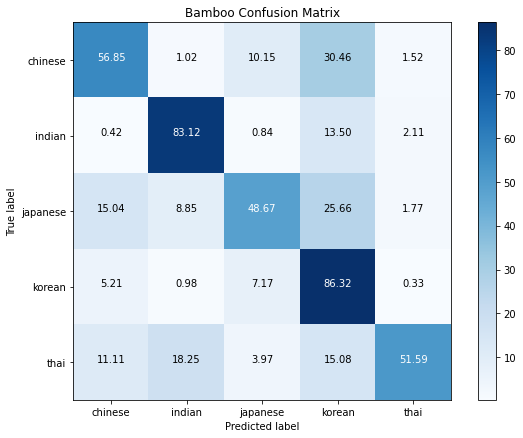

In [34]:
test_cuisines = np.unique(y_test)
bamboo_confusion_matrix = confusion_matrix(y_test, bamboo_pred_cuisines, test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [35]:
accuracy_score(y_test,bamboo_pred_cuisines)

0.7081632653061225

__2> KNN__

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [37]:
params = {'n_neighbors':range(1,6)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params, cv=5)
clf.fit(x_train, y_train)

knn_model = clf.best_estimator_

In [38]:
y_pred = knn_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106  11  18  54   8]
 [ 12 211   1  12   1]
 [ 11  10  67  24   1]
 [ 13  10  14 264   6]
 [ 13  41   7  14  51]]
              precision    recall  f1-score   support

     chinese       0.68      0.54      0.60       197
      indian       0.75      0.89      0.81       237
    japanese       0.63      0.59      0.61       113
      korean       0.72      0.86      0.78       307
        thai       0.76      0.40      0.53       126

    accuracy                           0.71       980
   macro avg       0.71      0.66      0.67       980
weighted avg       0.71      0.71      0.70       980



__3> LOGISTIC REGRESSION.__

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import log_loss

In [40]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [41]:
y_pred_log = logreg.predict(x_test)
y_pred_proba_log = logreg.predict_proba(x_test)

In [42]:
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_log))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_log))

LogisticRegression accuracy is 0.812
LogisticRegression log_loss is 0.548


In [43]:
scores_accuracy = cross_val_score(logreg, ingredients, cuisines, cv=18, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, ingredients, cuisines, cv=18, scoring='neg_log_loss')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.810
LogisticRegression average log_loss is 0.541


__4> Neural Network__

In [44]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [64]:
le=preprocessing.LabelEncoder()
x1=ingredients
y1=cuisines
#converting the target cell(cuisines)into numeric categories to work with ANN.(one hot encoding)
y1=pd.get_dummies(y1)                  
y1

,chinese,indian,japanese,korean,thai
65,0,1,0,0,0
66,0,1,0,0,0
67,0,1,0,0,0
68,0,1,0,0,0
69,0,1,0,0,0
...,...,...,...,...,...
57686,0,0,1,0,0
57687,0,0,1,0,0
57688,0,0,1,0,0
57689,0,0,1,0,0


Here,we got 5 columns thus our output layer of the neural network should also have 5 nodes.

In [60]:
model=Sequential()
model.add(Dense(170, input_dim=383, activation='relu'))           #input layer and 1st hidden layer.
model.add(Dense(103, activation='relu'))                          #Hidden layer.     
model.add(Dense(63, activation='relu'))                           #Hidden layer.                  
model.add(Dense(31, activation='relu'))                           #Hidden layer.
model.add(Dense(16, activation='relu'))                           #Hidden layer.
model.add(Dense(7, activation='relu'))                            #Hidden layer.
model.add(Dense(5, activation='softmax'))                         #OUtput layer.

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.fit(x1,y1, epochs=50, batch_size=10)

Epoch 1/50
245/245 [==============================] - 1s 3ms/step - loss: 1.3754 - accuracy: 0.3806
Epoch 2/50
245/245 [==============================] - 1s 3ms/step - loss: 0.7167 - accuracy: 0.7450
Epoch 3/50
245/245 [==============================] - 1s 2ms/step - loss: 0.4616 - accuracy: 0.8447
Epoch 4/50
245/245 [==============================] - 1s 2ms/step - loss: 0.3900 - accuracy: 0.8726
Epoch 5/50
245/245 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 0.9013
Epoch 6/50
245/245 [==============================] - 1s 3ms/step - loss: 0.2258 - accuracy: 0.9257
Epoch 7/50
245/245 [==============================] - 1s 3ms/step - loss: 0.1908 - accuracy: 0.9378
Epoch 8/50
245/245 [==============================] - 1s 2ms/step - loss: 0.1647 - accuracy: 0.9540
Epoch 9/50
245/245 [==============================] - 1s 3ms/step - loss: 0.1144 - accuracy: 0.9675
Epoch 10/50
245/245 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9730

In [63]:
accuracy = model.evaluate(x1,y1)

77/77 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9939


In [68]:
print("accuracy of our neural network is:",accuracy[1]*100,"%.")

accuracy of our neural network is: 99.38725233078003 %
